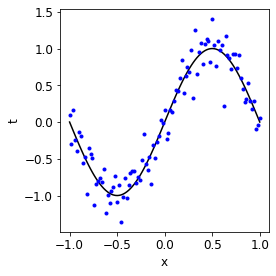

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [4, 4] # inches
mpl.rcParams['font.size'] = 12
# We set the random seed manually so that the results can be reproduced
np.random.seed(1234)
# define the data generating function
h = lambda x: np.sin(np.pi*x)
xmin = -1
xmax = 1
# Define a single independent variable
N = 101
x = np.linspace(xmin, xmax, num=N)
# Define the data with added noise
sigma = 0.2
t = h(x) + sigma*(np.random.randn(N))
# Add random Gaussian noise with unit variance
plt.figure()
plt.plot(x,h(x),'k-',x,t,'b.')
plt.xlabel('x')
plt.ylabel('t')
plt.tight_layout()

In [2]:
# Allow up to polynomials of degree 5
nw = 10
# Create the model
Phi = np.array([pow(x,j) for j in range(0,nw)]).transpose()
# Select up to 20 random points from the model
sample_indices = np.random.choice(np.linspace(0,N-1,N).astype(int),size=100,replace=False)


In [3]:
# Set up the initial state
alpha = 2.0
beta = (1/sigma)**2
m0 = np.zeros(nw)
S0 = (1/alpha)*np.eye(nw)

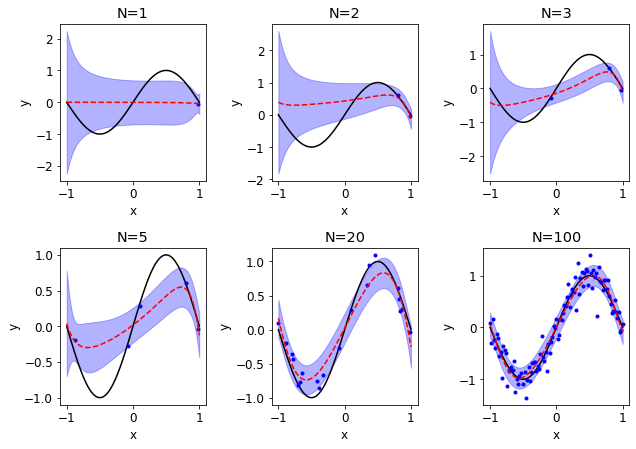

In [4]:
# Add one data point
plt.figure(figsize=[9,9])
for i,npts in enumerate([1,2,3,5,20,100]):
    xsample = np.atleast_2d(x[sample_indices[0:npts]])
    tsample = np.atleast_2d(t[sample_indices[0:npts]]).T
    Phisample = np.atleast_2d(Phi[sample_indices[0:npts]])
    invS0 = alpha*np.eye(nw)
    invSN = invS0 + beta*np.matmul(Phisample.T,Phisample)
    SN = np.linalg.inv(invSN)
    mN = np.squeeze(beta*np.matmul(SN,np.matmul(Phisample.T,tsample)))
    sigmasq = (1/beta) + np.diag(np.matmul(Phi,np.matmul(SN,Phi.T)))
    plt.subplot(3,3,i+1)
    plt.plot(x,h(x),'k-')
    plt.plot(np.squeeze(xsample),np.squeeze(tsample),'b.')
    y = np.matmul(Phi,mN)
    plt.plot(x,y,'r--')
    plt.fill_between(x,y-np.sqrt(sigmasq), y+np.sqrt(sigmasq),color='blue',alpha=0.3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'N={npts}')
    plt.tight_layout()
plt.savefig('bayesianprediction.png')